In [ ]:
%load_ext autoreload
%autoreload 2

from ETL import *
from yahist import Hist1D

from yahist.fit import fit_hist
from yahist.utils import ignore_division_errors
import scipy
import os
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
style.use('seaborn-white')

In [ ]:
sens = Sensor(height=21.4,width=21.6,x=0,y=0,deadspace=0.2)
sens.setActiveArea()

In [ ]:
sens.outline

In [10]:
sens.activeArea

[[-10.5, 10.600000000000001],
 [10.5, 10.600000000000001],
 [10.5, -10.600000000000001],
 [-10.5, -10.600000000000001]]

In [ ]:
sens.get_pixel_centers(m=16,n=16,gap=0.05)
sens.getPixelsOutline()

In [ ]:
sens.__dict__.keys()

In [ ]:
sens.y_pixel_size

In [ ]:
sens.pixels

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
pm = sens.getPolygon()
plt.gca().add_patch(pm)

for pix in sens.pixels:
    plt.gca().add_patch(pix.getPolygon())
plt.axis('scaled')

In [9]:
(16-1)*0.05*sens.y_pixel_size*16 + (16-1)*0.05*sens.x_pixel_size*16

30.525000000000002

In [12]:
(445.2-30.5)/445.2

0.9314914645103324

In [ ]:
(922.14-50)/922.14

In [ ]:
with open('new/database_new_filled.yaml') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['TDR'] 

In [7]:
s = Sensor(21.4, 21.6, deadspace=0.2)

dee = Dee(315, 1185)
dee.fromCenters2(disk_new['disk1']['front'], s, 16, 16, 0.05)

(-7.0275, 280.1275, -1100.4325, -958.3675000000001)

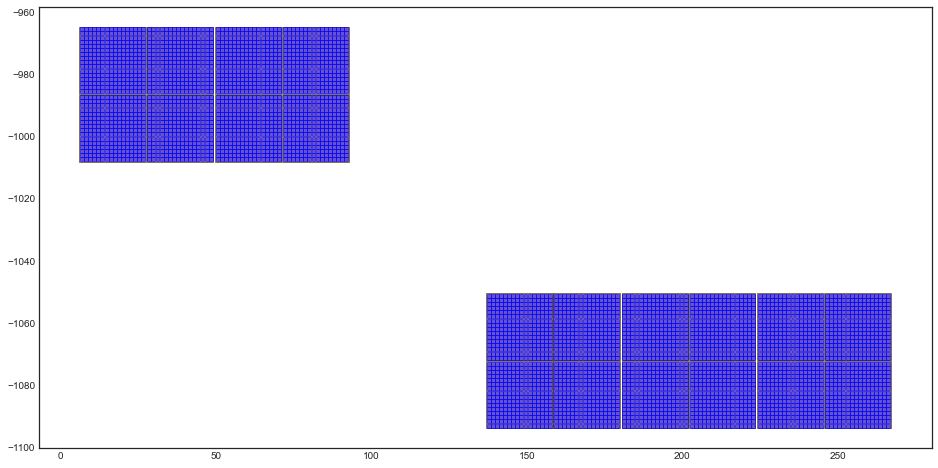

In [8]:
plt.rcParams['figure.figsize'] = [16, 16]

i = 0
for sen in dee.sensors:
    pm = sen.getPolygon()
    plt.gca().add_patch(pm)

    for pix in sen.pixels:
        plt.gca().add_patch(pix.getPolygon())
    
    i += 1
    if i == 20:
        break

plt.axis('scaled')